# Homework Assignment -3

## Group Members

- Jacob Pammer _()_
- Rohitashwa Chakraborty _(rc47878)_
- Vishal Gupta _()_


In [7]:
import pandas as pd
from pandas import Series, DataFrame

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# [Q1 10 points] Read in data

## Problem Statement:
Read in the files gold.txt and labels.txt.  The gold DataFrame should have columns url and category, while thelabelsDataFrame should havecolumnsturk,urlandcategory.  You will have to pick the right separator.

## Solution:
Reading gold.txt and labels.txt into DataFrames ```gold``` and ```labels``` respectively

## Code:

In [8]:
gold = pd.read_csv("gold.txt", sep = "\t", header=None)
gold.columns = ["url","category"]
print("Length of gold",len(gold))
gold.drop_duplicates(subset="url",inplace=True)
print("Length of gold after dropping duplicate urls",len(gold))

gold.head()

Length of gold 1517
Length of gold after dropping duplicate urls 1517


,url,category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X


In [9]:
labels = pd.read_csv("labels.txt", sep = "\t", header=None)
labels.columns = ["turk","url","category"]
print("Length of Labels",len(labels))
labels.head()

Length of Labels 92721


,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G


# [Q2 10 points] Split into two DataFrames
## Problem Statement

Split thelabelsDataFrame into two:labelsongoldandlabelsunknown,the former containing all rows where the url is present in the gold set, andthe latter one contains all remaining rows oflabels.

## Solution

.

## Code


In [10]:
gold_dict = set(gold["url"])
labels_on_gold = labels[labels.apply(lambda row: row["url"] in gold_dict, axis = 1)]
print("Length of Labels on Gold",len(labels_on_gold))
labels_on_gold.head()

Length of Labels on Gold 3324


,turk,url,category
245,A1253FXHCZ9CWM,http://0800-horoscope.com,G
246,A153PKAL7OAY36,http://0800-horoscope.com,G
247,A1FV9SAPL5C6KY,http://0800-horoscope.com,G
248,A1JTOT0DWM6QGL,http://0800-horoscope.com,G
249,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G


In [11]:
labels_unknown = labels[labels.apply(lambda row: row["url"] not in gold_dict, axis = 1)]
print("Length of Labels Unknown",len(labels_unknown))
labels_unknown.head()

Length of Labels Unknown 89397


,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G


# [Q3 10 points] Compute accuracies of turks

## Problem Statement

Create aratergoodnessDataFrame that is indexed by turk, and has twocolumns:  the number of ratings, and the average correctness of ratings foreach turk (both on gold set urls).

## Solution

.

## Code


In [12]:
df = pd.merge(left = labels_on_gold, right = gold, on = "url", suffixes = ("_labels","_gold"))
df

,turk,url,category_labels,category_gold
0,A1253FXHCZ9CWM,http://0800-horoscope.com,G,G
1,A153PKAL7OAY36,http://0800-horoscope.com,G,G
2,A1FV9SAPL5C6KY,http://0800-horoscope.com,G,G
3,A1JTOT0DWM6QGL,http://0800-horoscope.com,G,G
4,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G,G
...,...,...,...,...
3319,A35CBDDGBM7T6E,http://yousendit.com,G,G
3320,A3J86MK3VIE6ST,http://yousendit.com,G,G
3321,A4GP97LAQCCHJ,http://yousendit.com,G,G
3322,AAQNUEUU7H1Y5,http://yousendit.com,G,G


In [13]:
rater_goodness = DataFrame([], index = set(df["turk"]),
                            columns = ["Number of Ratings",
                            "Average Correctness of Ratings"])
print("Dimensions of rater_goodness: ",rater_goodness.shape)
rater_goodness.head()

Dimensions of rater_goodness:  (269, 2)


,Number of Ratings,Average Correctness of Ratings
A2QQBCDN6GQOKC,NaN,NaN
A3220HG1O83HQ4,NaN,NaN
A3QMK5XZX02CGN,NaN,NaN
A3J86MK3VIE6ST,NaN,NaN
A13OE9GBRJ0S2U,NaN,NaN


In [18]:
# creating merged dataframe with category marked by turk and known category
labels_merged = labels_on_gold.merge(gold, on='url', suffixes=('_turk', '_actual'))
labels_merged['correct_label'] = (labels_merged['category_turk'] == labels_merged['category_actual']).astype(int)

 

# creating groupby df to get total labels checked by each turk and average correctness
rater_goodness = labels_merged.groupby('turk')['correct_label'].agg(['count', 'mean'])
rater_goodness.columns = ["Number of Ratings","Average Correctness of Ratings"]
rater_goodness

,Number of Ratings,Average Correctness of Ratings
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
...,...,...
AYWOBMTEGFVVI,1,0.000000
AZ1S5BIG5R6P6,35,0.714286
AZSDW7JJL5VA7,100,0.680000


In [19]:
# df_grouped = df.groupby("turk")
# for item in df_grouped.groups:
#     temp = df_grouped.get_group(item)
#     rater_goodness["Number of Ratings"][item] = temp.shape[0]
#     rater_goodness["Average Correctness of Ratings"][item] = sum(temp.apply(lambda x: x["category_labels"] == x["category_gold"], axis = 1))/temp.shape[0]
# rater_goodness

# [Q4 10 points] Odds ratios

## Problem Statement

If someone is correctpfraction of the time, theoddsof success are defined as: $odds =p/(1.001−p)$ .Attach a column calledoddsto theratergoodnessDataFrame, using theaverage correctness of the turk as his or herp.

## Solution

.

## Code


In [20]:
rater_goodness["Odds"] = rater_goodness["Average Correctness of Ratings"].apply(lambda p: (p/(1.001-p)))
rater_goodness

,Number of Ratings,Average Correctness of Ratings,Odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
...,...,...,...
AYWOBMTEGFVVI,1,0.000000,0.000000
AZ1S5BIG5R6P6,35,0.714286,2.491281
AZSDW7JJL5VA7,100,0.680000,2.118380


# Q5

In [21]:
print("The top 20 most accurate Turks are:\n{0}".format(",\n".join(rater_goodness[rater_goodness["Number of Ratings"] >= 20].sort_values(by="Average Correctness of Ratings", ascending = False).index[:20])))

The top 20 most accurate Turks are:
A2U0R4X38GUKZE,
A22C0PJUBFJTI0,
A23YQUBXZPKILZ,
ATVALOQVDCMZW,
A1HIXWH4OXT8S4,
A3220HG1O83HQ4,
A32W20KGQXS0LL,
A20PWAB7G3HDHU,
AJSJVK40F5HM6,
A31OCN4MNHUQ6W,
A3MA9V9UPGCOK7,
A3IP9KYNZZ028B,
A3477QYMFXUC4I,
A1JTOT0DWM6QGL,
AVWJPWUEE3U4Q,
A25CRC4AZY5KC1,
A12RE8G66WTO8B,
A35GER5TWMH9VP,
APYV9Y0DFZFVP,
A153PKAL7OAY36


# Q6

Text(0.5, 1.0, 'Counts v/s Accuracy')

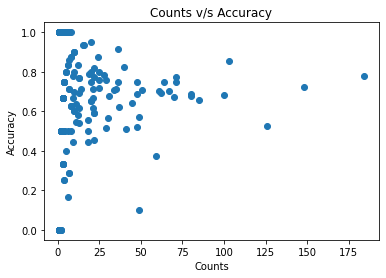

In [23]:
plt.scatter(rater_goodness["Number of Ratings"],
            rater_goodness["Average Correctness of Ratings"])
plt.xlabel("Counts")
plt.ylabel("Accuracy")
plt.title("Counts v/s Accuracy")

## Inference:

higher count implies reliability
lower counts could be spamming (though its only a minority)

# Q7

In [24]:
active_turks = rater_goodness[rater_goodness["Number of Ratings"] > rater_goodness["Number of Ratings"].quantile(0.75)]
active_turks

,Number of Ratings,Average Correctness of Ratings,Odds
turk,,,
A1253FXHCZ9CWM,29,0.517241,1.069214
A12RE8G66WTO8B,20,0.750000,2.988048
A153PKAL7OAY36,148,0.722973,2.600369
A18HIFA78GUAG9,13,0.538462,1.164144
A1DCIXV1JC91MY,22,0.590909,1.440922
...,...,...,...
AV30XWLULCP43,13,0.615385,1.595851
AVWJPWUEE3U4Q,36,0.750000,2.988048
AZ1S5BIG5R6P6,35,0.714286,2.491281


In [25]:
turk_group = pd.merge(active_turks, labels_unknown, left_index=True, right_on='turk')
turk_group

,Number of Ratings,Average Correctness of Ratings,Odds,turk,url,category
63,29,0.517241,1.069214,A1253FXHCZ9CWM,http://007absolutehardcore.com/early_cumshots/...,P
300,29,0.517241,1.069214,A1253FXHCZ9CWM,http://10000birds.com,G
435,29,0.517241,1.069214,A1253FXHCZ9CWM,http://101fetishes.com/femdomtorture/portal.htm,X
445,29,0.517241,1.069214,A1253FXHCZ9CWM,http://101greatgoals.com,G
660,29,0.517241,1.069214,A1253FXHCZ9CWM,http://123movers.com,G
...,...,...,...,...,...,...
90172,15,0.933333,13.793103,amurray,http://www.blazzpage.7p.com/,G
90173,15,0.933333,13.793103,amurray,http://www.byroncrawford.com/,P
90188,15,0.933333,13.793103,amurray,http://www.freelayouticons.com/,P
90189,15,0.933333,13.793103,amurray,http://www.hollywoodtuna.com/?p=4729,R


In [26]:
product_odds = turk_group.groupby(["url","category"])["Odds"].agg(["prod"])
product_odds.reset_index(inplace = True)
product_odds

,url,category,prod
0,http://0-101.net,G,2.155963
1,http://000.cc,G,1.460583
2,http://0000.jp,G,14.488244
3,http://000relationships.com,G,5.681060
4,http://000relationships.com,P,1.851852
...,...,...,...
13978,http://zynga.com,G,3.704611
13979,http://zz868.com,G,1.047852
13980,http://zz868.com,P,1.851852
13981,http://zzx.cc,G,1.330229


# Q8

In [27]:
x = product_odds.groupby("url")["prod"].agg(["max"]).reset_index()
q8 = pd.merge(x,product_odds, left_on = ["url","max"], right_on = ["url", "prod"])
q8 = q8.set_index("url")
q8

,max,category,prod
url,,,
http://0-101.net,2.155963,G,2.155963
http://000.cc,1.460583,G,1.460583
http://0000.jp,14.488244,G,14.488244
http://000relationships.com,5.681060,G,5.681060
http://000vitamins.com,3.784982,G,3.784982
...,...,...,...
http://zwinky.com,16.141443,G,16.141443
http://zylom.com,1.735526,G,1.735526
http://zynga.com,3.704611,G,3.704611


In [28]:
result_75 = pd.DataFrame(q8[["category","max"]])
result_75.columns = ["top category","top odds"]
result_75

,top category,top odds
url,,
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,5.681060
http://000vitamins.com,G,3.784982
...,...,...
http://zwinky.com,G,16.141443
http://zylom.com,G,1.735526
http://zynga.com,G,3.704611


# Q9

In [29]:
turks_25 = rater_goodness[rater_goodness["Number of Ratings"] > rater_goodness["Number of Ratings"].quantile(0.25)]
turks_25

,Number of Ratings,Average Correctness of Ratings,Odds
turk,,,
A1253FXHCZ9CWM,29,0.517241,1.069214
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
A13OE9GBRJ0S2U,4,0.750000,2.988048
A153PKAL7OAY36,148,0.722973,2.600369
...,...,...,...
AYUOM6WFSVC1C,2,1.000000,1000.000000
AZ1S5BIG5R6P6,35,0.714286,2.491281
AZSDW7JJL5VA7,100,0.680000,2.118380


In [30]:
turk25_group = pd.merge(turks_25, labels_unknown, left_index=True, right_on='turk')
turk25_group

,Number of Ratings,Average Correctness of Ratings,Odds,turk,url,category
63,29,0.517241,1.069214,A1253FXHCZ9CWM,http://007absolutehardcore.com/early_cumshots/...,P
300,29,0.517241,1.069214,A1253FXHCZ9CWM,http://10000birds.com,G
435,29,0.517241,1.069214,A1253FXHCZ9CWM,http://101fetishes.com/femdomtorture/portal.htm,X
445,29,0.517241,1.069214,A1253FXHCZ9CWM,http://101greatgoals.com,G
660,29,0.517241,1.069214,A1253FXHCZ9CWM,http://123movers.com,G
...,...,...,...,...,...,...
90172,15,0.933333,13.793103,amurray,http://www.blazzpage.7p.com/,G
90173,15,0.933333,13.793103,amurray,http://www.byroncrawford.com/,P
90188,15,0.933333,13.793103,amurray,http://www.freelayouticons.com/,P
90189,15,0.933333,13.793103,amurray,http://www.hollywoodtuna.com/?p=4729,R


In [31]:
product_odds25 = turk25_group.groupby(["url","category"])["Odds"].agg(["prod"])
product_odds25.reset_index(inplace = True)
product_odds25

,url,category,prod
0,http://0-101.net,G,2.155963e+00
1,http://000.cc,G,2.181050e+03
2,http://000.cc,P,9.980040e-01
3,http://0000.jp,G,2.877556e+07
4,http://000relationships.com,G,0.000000e+00
...,...,...,...
16685,http://zz868.com,G,1.209566e+13
16686,http://zz868.com,P,1.851852e+00
16687,http://zzx.cc,G,1.330229e+00
16688,http://zzx.cc,P,9.980040e-01


In [32]:
x = product_odds25.groupby("url")["prod"].agg(["max"]).reset_index()
q9 = pd.merge(x,product_odds25, left_on = ["url","max"], right_on = ["url", "prod"])
q9 = q9.set_index("url")
q9

,max,category,prod
url,,,
http://0-101.net,2.155963e+00,G,2.155963e+00
http://000.cc,2.181050e+03,G,2.181050e+03
http://0000.jp,2.877556e+07,G,2.877556e+07
http://000relationships.com,1.851852e+00,P,1.851852e+00
http://000vitamins.com,5.014149e+00,G,5.014149e+00
...,...,...,...
http://zwinky.com,1.000000e+03,P,1.000000e+03
http://zylom.com,2.873345e+03,G,2.873345e+03
http://zynga.com,5.442125e+01,G,5.442125e+01


In [33]:
result_25 = pd.DataFrame(q9[["category","max"]])
result_25.columns = ["top category","top odds"]
result_25

,top category,top odds
url,,
http://0-101.net,G,2.155963e+00
http://000.cc,G,2.181050e+03
http://0000.jp,G,2.877556e+07
http://000relationships.com,P,1.851852e+00
http://000vitamins.com,G,5.014149e+00
...,...,...
http://zwinky.com,P,1.000000e+03
http://zylom.com,G,2.873345e+03
http://zynga.com,G,5.442125e+01


In [39]:
pd.crosstab(index = result_75.reset_index()["top category"], rownames = ["75%ile"],
            columns = result_25.reset_index()["top category"], colnames = ["25%ile"])

25%ile,G,P,R,X
75%ile,,,,
G,7510,830,340,623
P,471,57,28,29
R,171,16,8,13
X,406,39,15,56


In [43]:
pd.crosstab(index = result_75.reset_index()["top category"], rownames = ["75%ile"],
            columns = result_25.reset_index()["top category"], colnames = ["25%ile"], normalize = 0)

25%ile,G,P,R,X
75%ile,,,,
G,0.807266,0.089219,0.036547,0.066968
P,0.805128,0.097436,0.047863,0.049573
R,0.822115,0.076923,0.038462,0.062500
X,0.786822,0.075581,0.029070,0.108527


# Inference:

